In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
Season             756 non-null object
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(4), object(14)
memory usage: 106.4+ KB


In [4]:
matches.shape

(756, 18)

### Data cleaning

In [5]:
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
#Remove umpire as its not going to make any impact on result
matches.drop(columns=['umpire1', 'umpire2', 'umpire3'], inplace=True)

In [7]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
# Collect uniques seasons
seasons = matches['Season'].unique()
print('Seasons : ', seasons)

Seasons :  ['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'
 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019']


In [9]:
# Collect unique teams
teams = np.unique(matches[['team1', 'team2']].values)
print('Teams : ', teams)

Teams :  ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [10]:
# Collect uniques cities
cities = matches.city.unique()
print('Cities : ', cities)

Cities :  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


### Need to do below changes

1/ Citi: Replace 'Bangalore' with 'Bengaluru'

In [11]:
matches.city.replace({'Bangalore', 'Bengaluru'}, inplace=True)

In [12]:
#As below teams changed there names
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
matches.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)

In [13]:
#Unique city
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [14]:
#Unique teams
np.unique(matches[['team1', 'team2']].values)

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [15]:
matches.isnull().sum().sum()

15

In [16]:
#List all null rows
matches[matches.isna().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


Columns winner, player_of_match are NaN when match is no result due any reason.
Also cities are NaN where stadium is in Dubai. So need to change all NaN cities with Dubai.

In [17]:
matches['city'] = matches['city'].fillna('Dubai')

In [18]:
matches[matches.isna().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


### Find maches played in cities

In [19]:
cities = matches.groupby('city')[['id']].count()
cities.rename(columns={'id' : 'total_matches'}, inplace=True)
cities = cities.sort_values('total_matches', ascending=False).reset_index()
cities

,city,total_matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


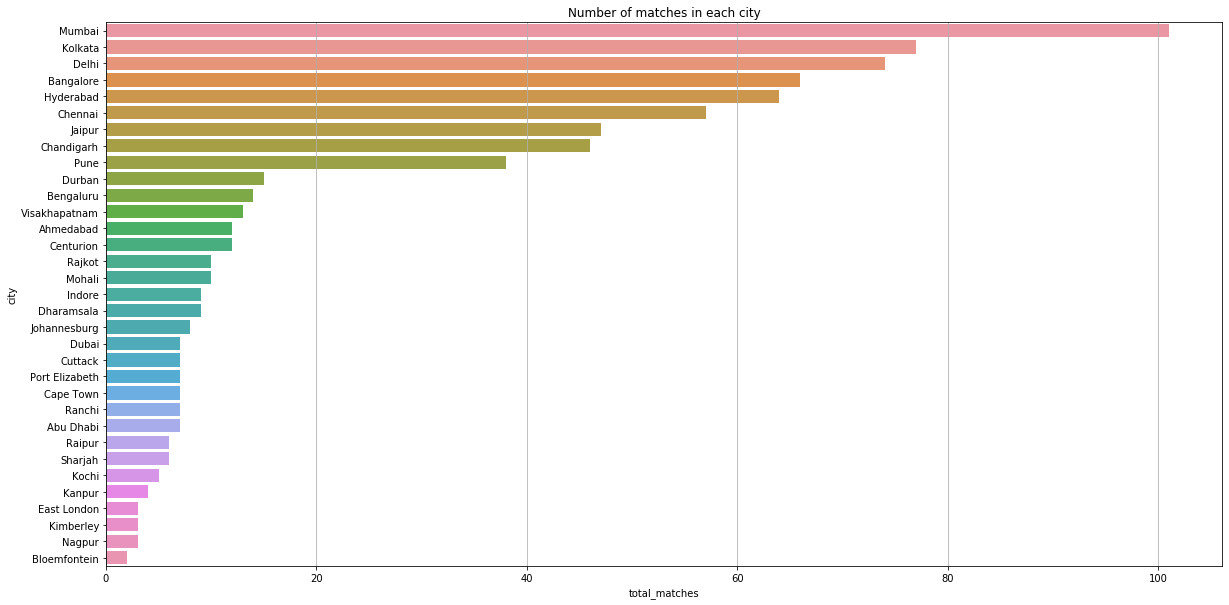

In [20]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Number of matches in each city')
sns.barplot(x='total_matches', y='city', data=cities)

### Find total matches won by each team

In [21]:
winner_count = matches.groupby("winner")[['id']].count()
winner_count.rename(columns={'id':'total_win'}, inplace=True)
winner_count = winner_count.sort_values('total_win', ascending=False).reset_index()
winner_count

,winner,total_win
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


<BarContainer object of 12 artists>

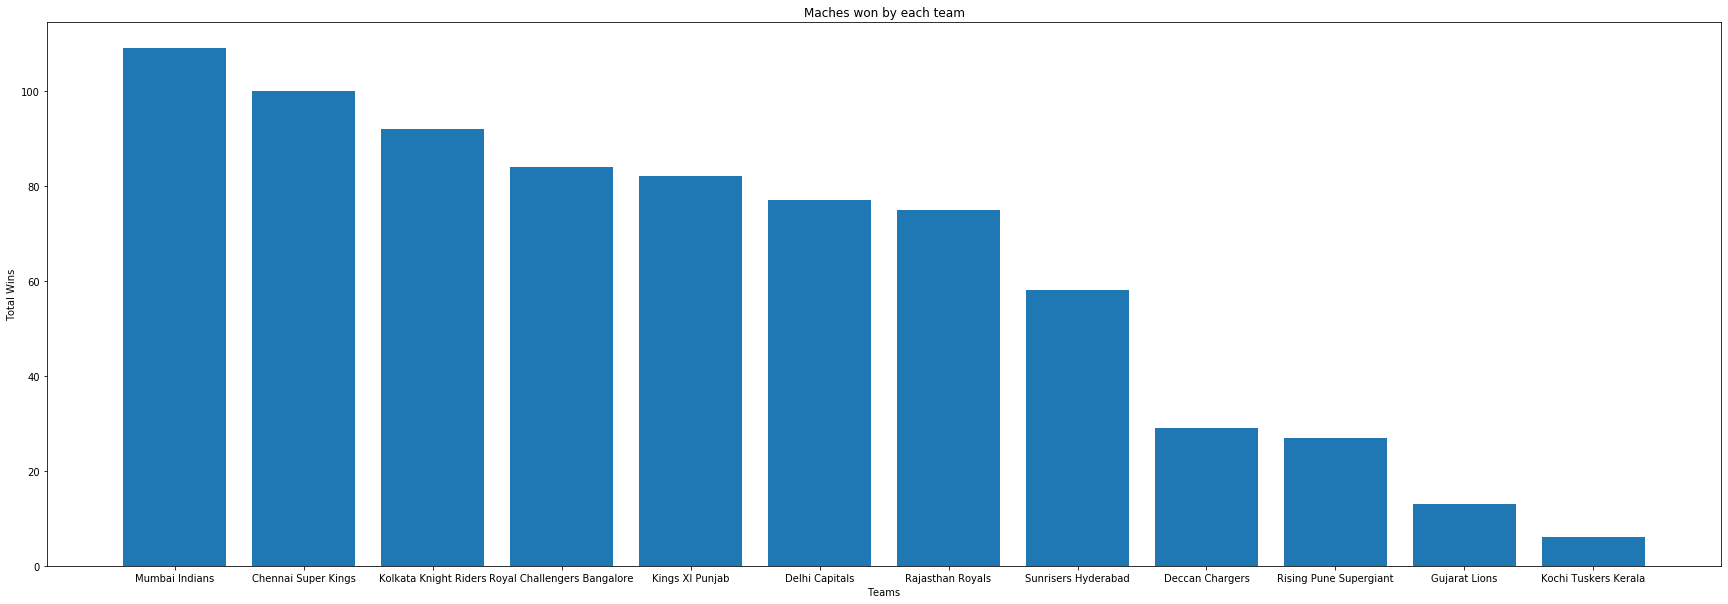

In [22]:
plt.figure(figsize=(30,10))
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.title('Maches won by each team')
plt.bar(winner_count.winner, winner_count.total_win)

<BarContainer object of 12 artists>

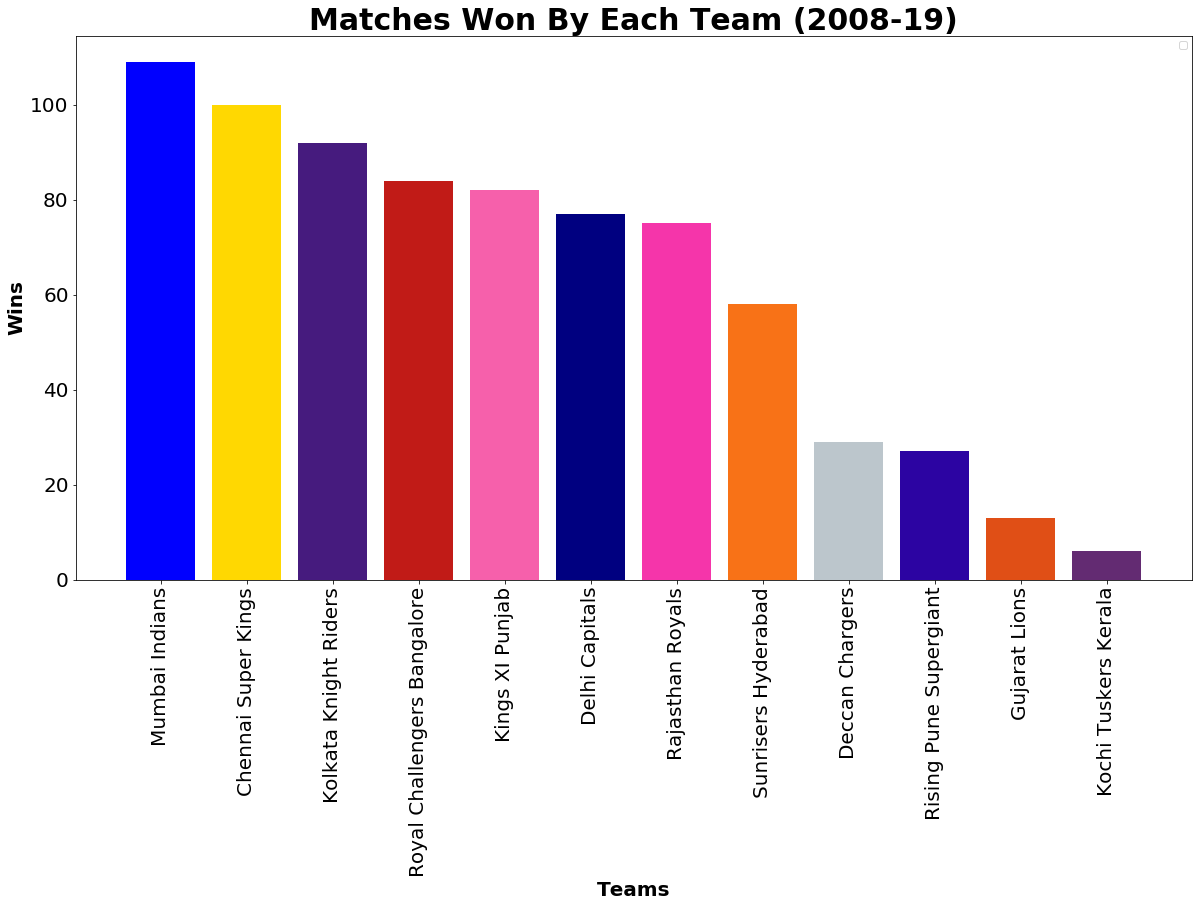

In [23]:
plt.figure(figsize=(20,10))

plt.legend(winner_count.winner, loc=1)
plt.xlabel('Teams', fontweight='bold',fontsize=20)
plt.ylabel('Wins', fontweight='bold', fontsize=20, rotation=90)

plt.tick_params(labelsize=20)
plt.xticks(rotation=90)

plt.title('Matches Won By Each Team (2008-19)', fontweight='bold', fontsize=30)

plt.bar(winner_count.winner, winner_count.total_win, color=['#0000FF', '#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72'])


In [24]:
season = matches.groupby(['Season']).size().reset_index(name='matches')
season = season.sort_values(['Season'], ascending=False)
season

,Season,matches
11,IPL-2019,60
10,IPL-2018,60
9,IPL-2017,59
8,IPL-2016,60
7,IPL-2015,59
6,IPL-2014,60
5,IPL-2013,76
4,IPL-2012,74
3,IPL-2011,73
2,IPL-2010,60


<BarContainer object of 12 artists>

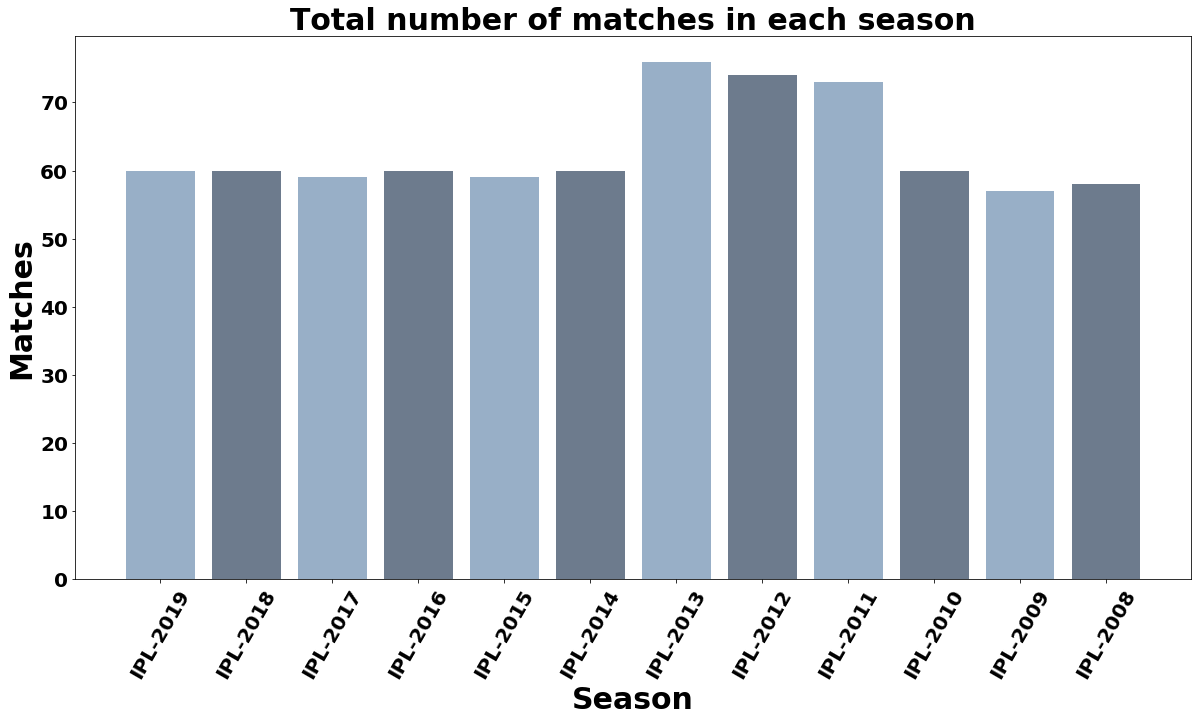

In [25]:
plt.figure(figsize=(20,10))

plt.xlabel('Season', fontweight='bold' , fontsize=30)
plt.ylabel('Matches', fontweight='bold',fontsize=30, rotation=90)
plt.title('Total number of matches in each season', fontweight='bold', fontsize=30)
plt.yticks(fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20, rotation=60)
plt.bar(season['Season'], season['matches'], color=['#98AFC7', '#6D7B8D'])

# Section 3: Asking Interesting Questions on data

I will be asking following Questions:

1. What was the most preferred Decision On winning Toss i.e. Choose To Bat / Choose To Field

2. Which Decision has proved most beneficial i.e Field / Bat

3. Which Venue has hosted the Most Number Of Ipl Matches

4. Who has been awarded with Player Of the Max maximum Number Of Times

5. Who Has Won the Ipl Trophy Most Number of Times

6. Which Season had Most Number of Matches Played

#### 1. What was the most preferred Decision On winning Toss i.e. Choose To Bat / Choose To Field

In [26]:
tossed_decision = matches.groupby(['toss_decision']).size().reset_index(name='total')
tossed_decision

,toss_decision,total
0,bat,293
1,field,463


<BarContainer object of 2 artists>

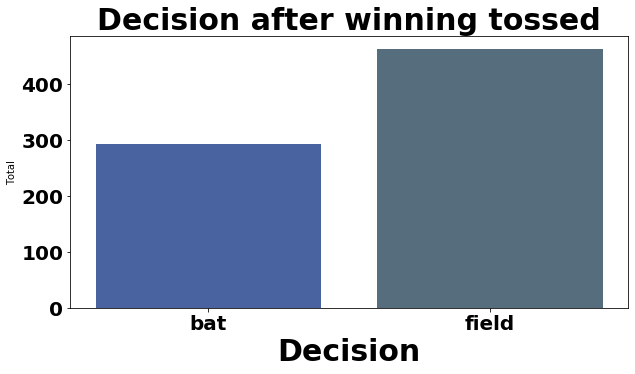

In [27]:
plt.figure(figsize=(10,5))

plt.title('Decision after winning tossed', fontweight='bold', fontsize='30')
plt.xlabel('Decision', fontweight='bold', fontsize='30')
plt.ylabel('Total')
plt.xticks(fontweight='bold', fontsize='20')
plt.yticks(fontweight='bold', fontsize='20')
plt.bar(tossed_decision['toss_decision'], tossed_decision['total'], color=['#4863A0', '#566D7E'])

Fielding is most preffered decision

#### 2. Which Decision has proved most beneficial i.e Field / Bat

In [28]:
bat_win = matches.loc[(matches['toss_decision']=='bat')&(matches['toss_winner']==matches['winner']), ['winner', 'toss_decision']]
bat_win

,winner,toss_decision
4,Royal Challengers Bangalore,bat
14,Delhi Capitals,bat
20,Sunrisers Hyderabad,bat
50,Delhi Capitals,bat
54,Royal Challengers Bangalore,bat
...,...,...
713,Chennai Super Kings,bat
729,Mumbai Indians,bat
741,Delhi Capitals,bat
746,Mumbai Indians,bat


In [29]:
field_win = matches.loc[(matches['toss_decision']=='field')&(matches['toss_winner']==matches['winner']), ['winner', 'toss_decision']]
field_win

,winner,toss_decision
1,Rising Pune Supergiant,field
2,Kolkata Knight Riders,field
3,Kings XI Punjab,field
5,Sunrisers Hyderabad,field
6,Mumbai Indians,field
...,...,...
749,Royal Challengers Bangalore,field
750,Kings XI Punjab,field
751,Mumbai Indians,field
753,Delhi Capitals,field


In [30]:
result_decision = pd.concat([bat_win, field_win])
result_decision = result_decision.groupby(['toss_decision']).size().reset_index(name='total')
result_decision

,toss_decision,total
0,bat,134
1,field,259


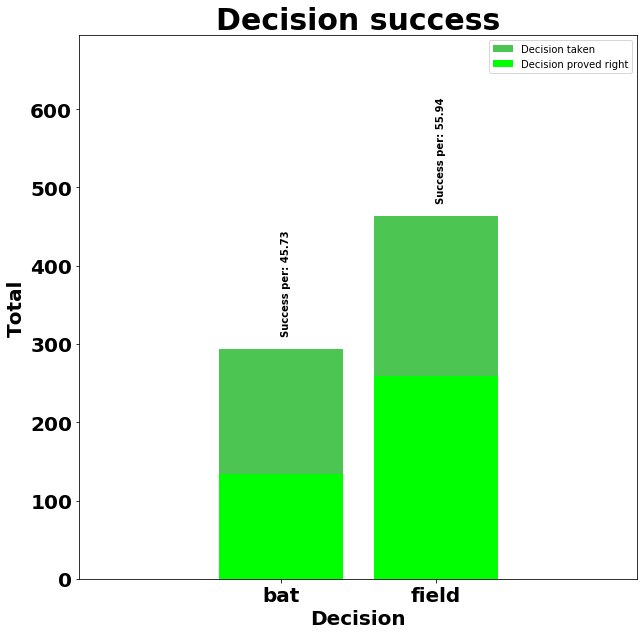

In [31]:
plt.figure(figsize=(10,10))
plt.title('Decision success', fontweight='bold', fontsize=30)
plt.xlabel('Decision', fontweight='bold', fontsize=20)
plt.ylabel('Total', fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20)
plt.yticks(fontweight='bold', fontsize=20)
plt.margins(x=0.5, y=0.5)
plt.bar(tossed_decision['toss_decision'], tossed_decision['total'], color=['#4CC552', '#4CC552'])
plt.bar(result_decision['toss_decision'], result_decision['total'], color=['#00FF00', '#00FF00'])
plt.legend(['Decision taken', 'Decision proved right'])

for i, total in enumerate(tossed_decision['total']):
    success_per =  result_decision['total'][i] / tossed_decision['total'][i]
    plt.text(i, total+20, "Success per: " + str(round(success_per*100,2)), fontweight='bold', fontsize=10, rotation=90)


#### 3. Which Venue has hosted the Most Number Of Ipl Matches

In [32]:
venue = matches.groupby('venue').size().reset_index(name='total')
venue = venue.sort_values('total', ascending=False)
venue

,venue,total
8,Eden Gardens,77
40,Wankhede Stadium,73
17,M Chinnaswamy Stadium,73
9,Feroz Shah Kotla,67
28,"Rajiv Gandhi International Stadium, Uppal",56
20,"MA Chidambaram Stadium, Chepauk",49
32,Sawai Mansingh Stadium,47
27,"Punjab Cricket Association Stadium, Mohali",35
21,Maharashtra Cricket Association Stadium,21
5,Dr DY Patil Sports Academy,17


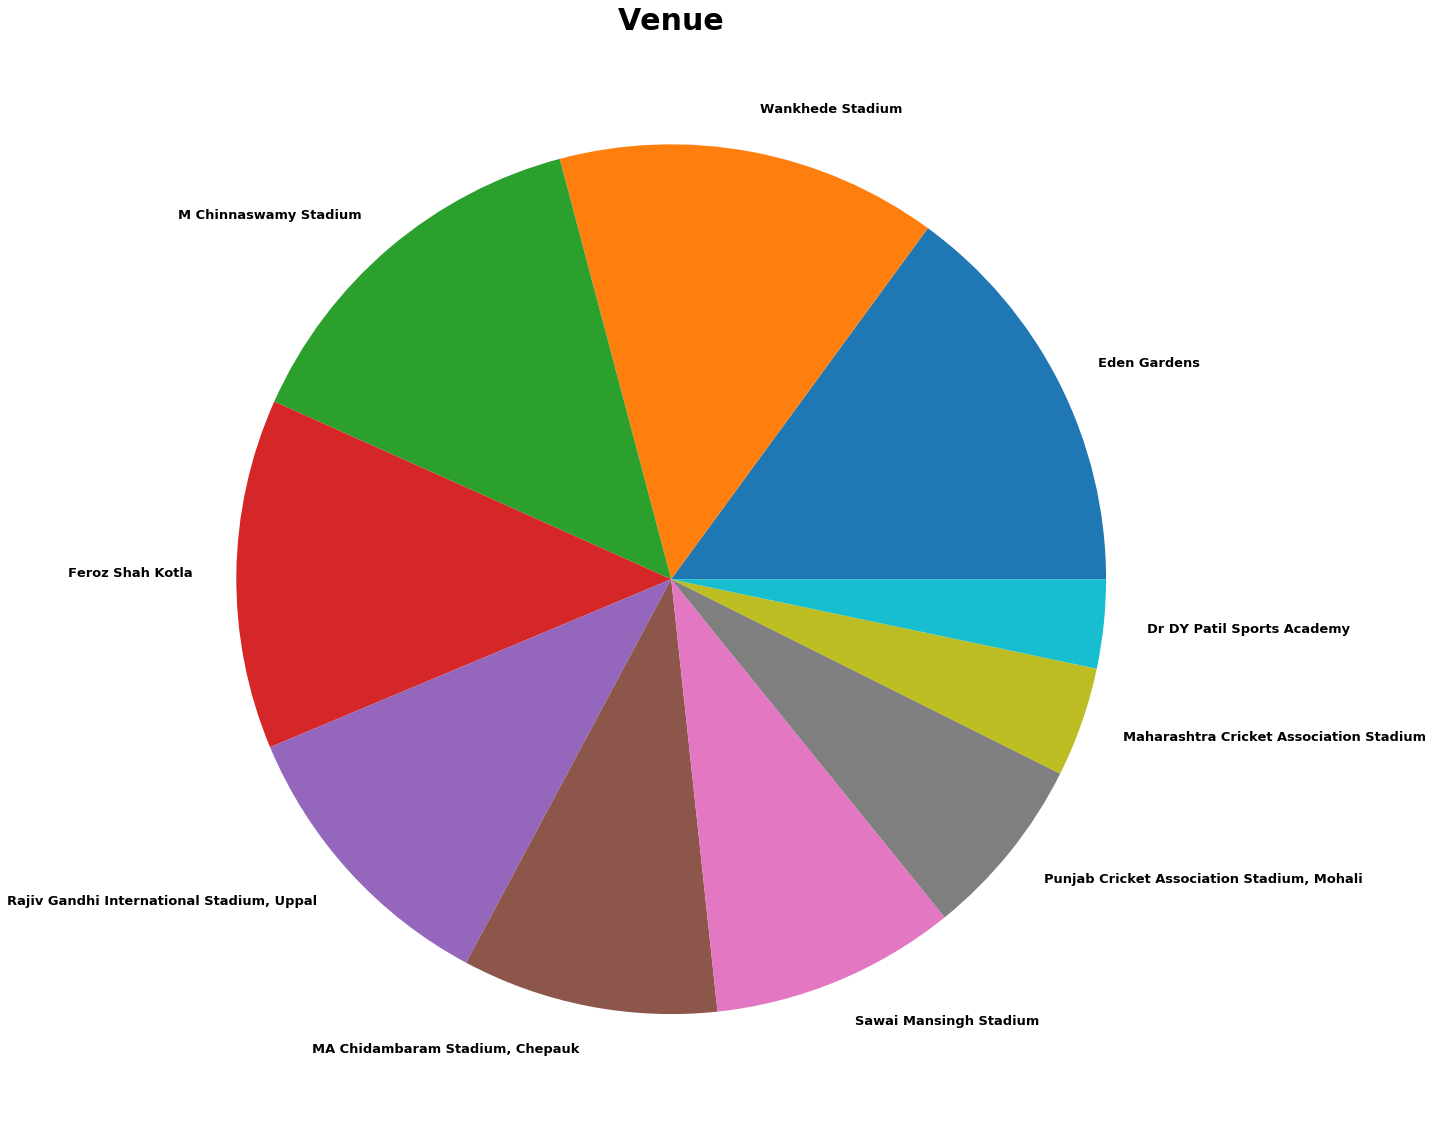

In [33]:
#Take only top 10 venue for graphical representation
plt.figure(figsize=(20,20))
plt.title('Venue', fontweight='bold', fontsize='30')
plt.pie(venue['total'][:10], labels=venue['venue'][:10], textprops={'fontsize':'13', 'fontweight':'bold'})
plt.show()

#### 4. Who has been awarded with Player Of the Max maximum Number Of Times

In [34]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [35]:
player_of_the_match = matches.groupby('player_of_match').size().reset_index(name='total')
player_of_the_match = player_of_the_match.sort_values('total', ascending=False)
player_of_the_match[:20]

,player_of_match,total
35,CH Gayle,21
10,AB de Villiers,20
137,MS Dhoni,17
42,DA Warner,17
167,RG Sharma,17
222,YK Pathan,16
201,SR Watson,15
191,SK Raina,14
56,G Gambhir,13
123,MEK Hussey,12


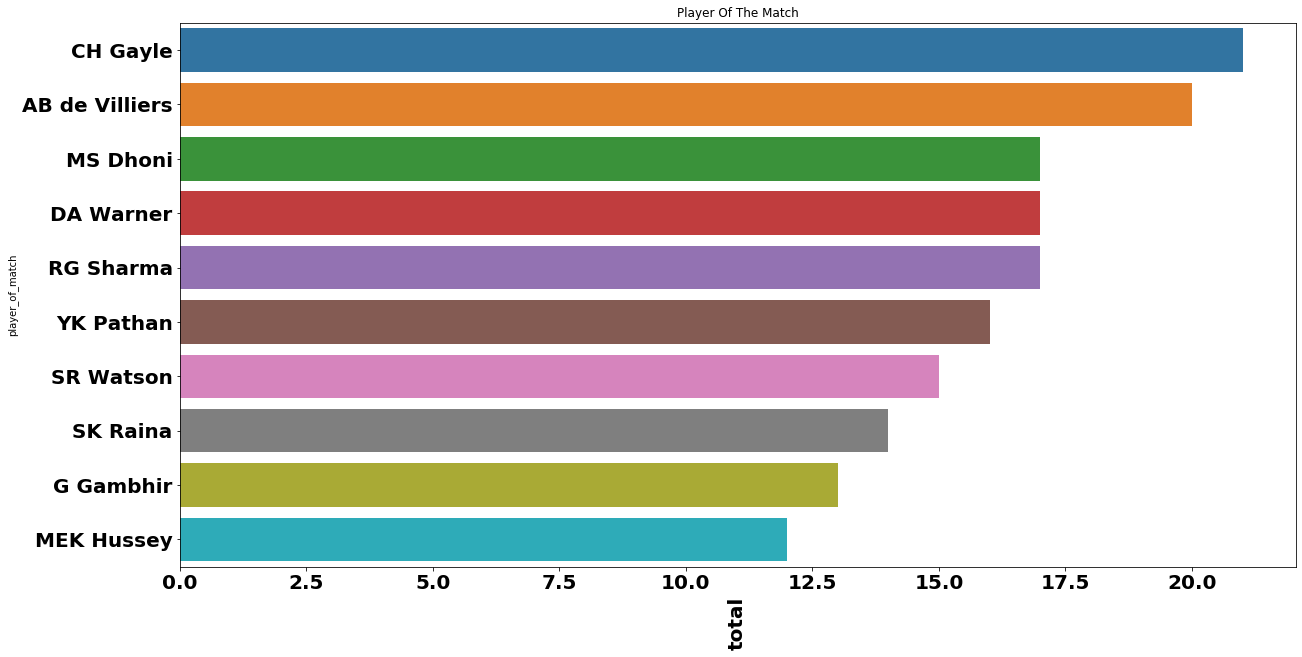

In [36]:
plt.figure(figsize=(20,10))
plt.title('Player Of The Match')
plt.xticks(fontweight='bold', fontsize=20)
plt.yticks(fontweight='bold', fontsize=20)
plt.xlabel('Player Name', fontweight='bold', fontsize=20)
plt.xlabel('Total player of the match', fontweight='bold', fontsize=20, rotation=90)
sns.barplot(player_of_the_match['total'][:10], player_of_the_match['player_of_match'][:10])
plt.show()

CH Gayle won most number of player of the match award

#### 5. Who Has Won the Ipl Trophy Most Number of Times

In [37]:
final_match = matches.groupby('Season').tail(1).copy()
#final_match = final_match.groupby('winner').size().reset_index(name='total')
#final_match = final_match.sort_values('total', ascending=False)
final_match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium


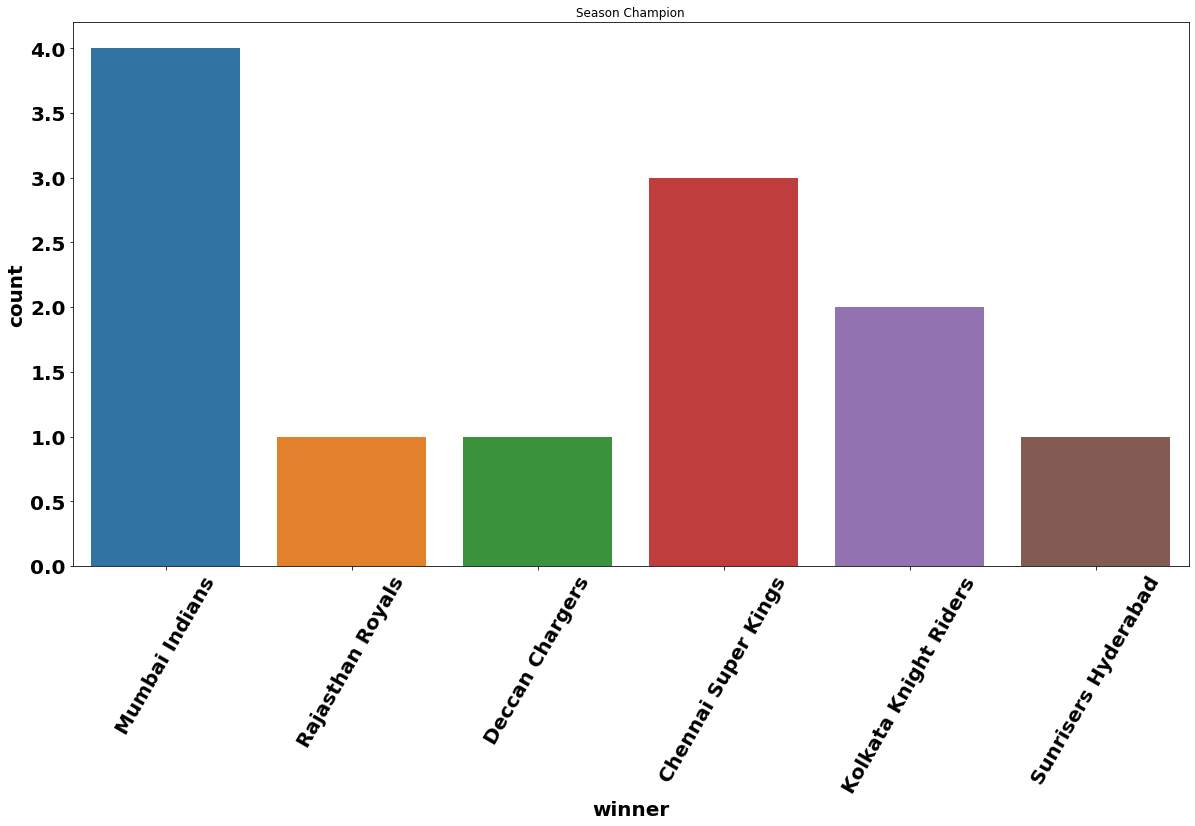

In [38]:
plt.figure(figsize=(20,10))
plt.xlabel('Team', fontweight='bold', fontsize=20)
plt.ylabel('Total', fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20, rotation=60)
plt.yticks(fontweight='bold', fontsize=20)
plt.title('Season Champion')
sns.countplot(x=final_match['winner'])
plt.show()

Mumbai Indians won more number of trophies

#### 6. Which Season had Most Number of Matches Played

In [39]:
seasons = matches.groupby('Season').size().reset_index(name='total')
seasons

,Season,total
0,IPL-2008,58
1,IPL-2009,57
2,IPL-2010,60
3,IPL-2011,73
4,IPL-2012,74
5,IPL-2013,76
6,IPL-2014,60
7,IPL-2015,59
8,IPL-2016,60
9,IPL-2017,59


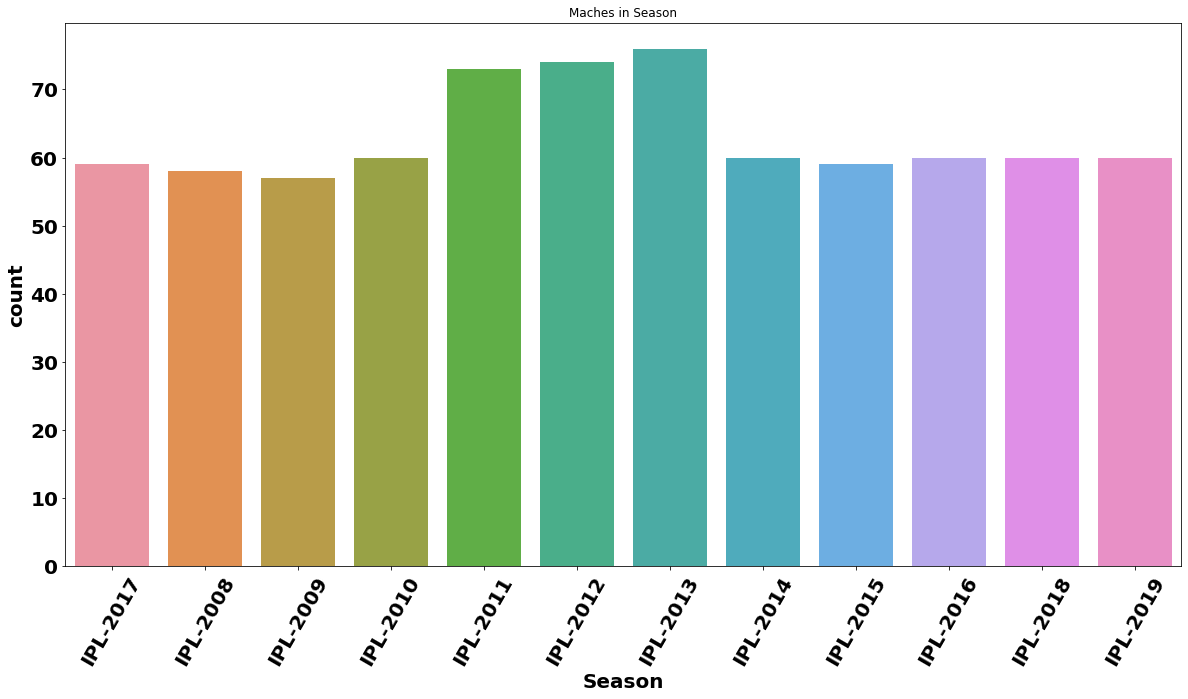

In [40]:
plt.figure(figsize=(20,10))
plt.title('Maches in Season')
plt.xlabel('Season', fontweight='bold', fontsize=20)
plt.ylabel('Total', fontweight='bold', fontsize=20, rotation=90)
plt.xticks(fontweight='bold', fontsize=20, rotation=60)
plt.yticks(fontweight='bold', fontsize=20)
sns.countplot(x=matches['Season'])
plt.show()


We have most matches in season IPL-2013